In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
german = pd.read_csv('german.data',header = None, sep = " ")
columns = ['Checking account','Duration(month)','Credit history','Purpose',\
           'Credit Amount','Savings/Stocks','Present employment Length',\
           'Installment rate','Personal status','Guarantors',\
           'Residing since','Property','Age(years)','Other installment plans',\
           'Housing','No of credits',\
           'Job','dependents','Telephone','foreign worker','Creditability']
german.columns = columns

In [3]:
german.head()

,Checking account,Duration(month),Credit history,Purpose,Credit Amount,Savings/Stocks,Present employment Length,Installment rate,Personal status,Guarantors,...,Property,Age(years),Other installment plans,Housing,No of credits,Job,dependents,Telephone,foreign worker,Creditability
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [4]:
german.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
Checking account             1000 non-null object
Duration(month)              1000 non-null int64
Credit history               1000 non-null object
Purpose                      1000 non-null object
Credit Amount                1000 non-null int64
Savings/Stocks               1000 non-null object
Present employment Length    1000 non-null object
Installment rate             1000 non-null int64
Personal status              1000 non-null object
Guarantors                   1000 non-null object
Residing since               1000 non-null int64
Property                     1000 non-null object
Age(years)                   1000 non-null int64
Other installment plans      1000 non-null object
Housing                      1000 non-null object
No of credits                1000 non-null int64
Job                          1000 non-null object
dependents                   1000 non-null int64
T

In [5]:
german['Creditability'].value_counts()

1    700
2    300
Name: Creditability, dtype: int64

In [6]:
german['Checking account'].value_counts()

A14    394
A11    274
A12    269
A13     63
Name: Checking account, dtype: int64

In [7]:
german['Credit Amount'].describe()

count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: Credit Amount, dtype: float64

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, StratifiedKFold
X_train, X_test, y_train, y_test = train_test_split(german.iloc[:,:-1], german.iloc[:,-1:], test_size=0.20, random_state=4212)

In [11]:
train = german.iloc[:,:-1]
test = german.iloc[:,-1:]
train = train.apply(LabelEncoder().fit_transform)


In [12]:
X_train = X_train.apply(LabelEncoder().fit_transform)
X_test = X_test.apply(LabelEncoder().fit_transform)

Random Forest Classifier

In [13]:
forest = RandomForestClassifier(n_estimators=100, n_jobs=4)
forest = forest.fit(X_train,y_train.values.ravel())
result = forest.predict(X_test)

In [14]:
output = pd.DataFrame( data={"predicted":result,"actual":y_test.values.ravel()} )
output.head()

,actual,predicted
0,2,1
1,1,1
2,1,1
3,2,1
4,1,1


In [15]:
print ("accuracy score: ", accuracy_score(y_test.values,result))
print(classification_report(y_test.values,result, target_names=['Good','Bad']))

accuracy score:  0.73
             precision    recall  f1-score   support

       Good       0.78      0.87      0.82       143
        Bad       0.54      0.39      0.45        57

avg / total       0.71      0.73      0.72       200



In [16]:
import itertools
estimators = [10,100,300,600,800,1000]
depth = [1,2,50,100,300,800,10000,None]
features = ['auto','sqrt',0.2]
min_sampleleaf = [1,5,10,50,100,200,500]
randomstate = [1,50,100,500,None]
a = list(itertools.product(estimators,depth,features,min_sampleleaf,\
                           randomstate))
len(a)

5040

In [17]:
for i in range(len(estimators)):
    forest = RandomForestClassifier(n_estimators=estimators[i], n_jobs=4)
    forest = forest.fit(X_train,y_train.values.ravel())
    result = forest.predict(X_test)
    output = pd.DataFrame( data={"predicted":result,"actual":y_test.values.ravel()} )
    print ("accuracy score:%s \t estimators:%s "%(accuracy_score(y_test.values,result),estimators[i]))

accuracy score:0.73 	 estimators:10 
accuracy score:0.72 	 estimators:100 
accuracy score:0.755 	 estimators:300 
accuracy score:0.75 	 estimators:600 
accuracy score:0.745 	 estimators:800 
accuracy score:0.755 	 estimators:1000 


In [18]:
for i in range(len(depth)):
    forest = RandomForestClassifier(n_estimators=300, n_jobs=4, max_depth = depth[i])
    forest = forest.fit(X_train,y_train.values.ravel())
    result = forest.predict(X_test)
    output = pd.DataFrame( data={"predicted":result,"actual":y_test.values.ravel()} )
    print ("accuracy score:%s \t depth:%s "%(accuracy_score(y_test.values,result),depth[i]))

accuracy score:0.715 	 depth:1 
accuracy score:0.715 	 depth:2 
accuracy score:0.74 	 depth:50 
accuracy score:0.73 	 depth:100 
accuracy score:0.75 	 depth:300 
accuracy score:0.74 	 depth:800 
accuracy score:0.735 	 depth:10000 
accuracy score:0.745 	 depth:None 


In [19]:
for i in range(len(features)):
    forest = RandomForestClassifier(n_estimators=300, n_jobs=4, max_depth = 100,max_features = features[i])
    forest = forest.fit(X_train,y_train.values.ravel())
    result = forest.predict(X_test)
    output = pd.DataFrame( data={"predicted":result,"actual":y_test.values.ravel()} )
    print ("accuracy score:%s \t max features:%s "%(accuracy_score(y_test.values,result),features[i]))

accuracy score:0.755 	 max features:auto 
accuracy score:0.75 	 max features:sqrt 
accuracy score:0.745 	 max features:0.2 


In [20]:
for i in range(len(min_sampleleaf)):
    forest = RandomForestClassifier(n_estimators=300, n_jobs=4, max_depth = 100,max_features = 'auto',\
                                   min_samples_leaf =min_sampleleaf[i] )
    forest = forest.fit(X_train,y_train.values.ravel())
    result = forest.predict(X_test)
    output = pd.DataFrame( data={"predicted":result,"actual":y_test.values.ravel()} )
    print ("accuracy score:%s \t min sample leaf:%s "%(accuracy_score(y_test.values,result),min_sampleleaf[i]))

accuracy score:0.745 	 min sample leaf:1 
accuracy score:0.74 	 min sample leaf:5 
accuracy score:0.74 	 min sample leaf:10 
accuracy score:0.715 	 min sample leaf:50 
accuracy score:0.715 	 min sample leaf:100 
accuracy score:0.715 	 min sample leaf:200 
accuracy score:0.715 	 min sample leaf:500 


accuracy score:0.745 	 random state:1 
accuracy score:0.755 	 random state:50 
accuracy score:0.755 	 random state:100 
accuracy score:0.77 	 random state:500 
accuracy score:0.755 	 random state:None 


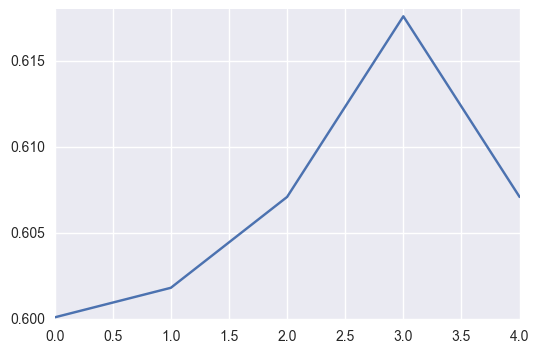

In [21]:
roc_auc = []
for i in range(len(randomstate)):
    forest = RandomForestClassifier(n_estimators=300, n_jobs=4, max_depth = 100,max_features = 'auto',\
                                   min_samples_leaf =10,random_state = randomstate[i] )
    forest = forest.fit(X_train,y_train.values.ravel())
    result = forest.predict(X_test)
    output = pd.DataFrame( data={"predicted":result,"actual":y_test.values.ravel()} )
    print ("accuracy score:%s \t random state:%s "%(accuracy_score(y_test.values,result),randomstate[i]))
    fpr,tpr,_ = roc_curve(y_test.values,result,pos_label=2)  
    roc_auc.append(auc(fpr,tpr))
plt.plot(range(0,len(roc_auc)),roc_auc)

Best Features:

In [22]:
forest = RandomForestClassifier(n_estimators=300, n_jobs=4, max_depth = 100,max_features = 'auto',\
                                   min_samples_leaf =10,random_state = None )
forest = forest.fit(X_train,y_train.values.ravel())
result = forest.predict(X_test)
output = pd.DataFrame( data={"predicted":result,"actual":y_test.values.ravel()} )

print ("accuracy score:%s"%(accuracy_score(y_test.values,result))

SyntaxError: unexpected EOF while parsing (<ipython-input-22-fdf9011e1851>, line 6)

In [ ]:
featureset = pd.DataFrame(columns = ['accuracy','estimators','max depth','max features',\
                                     'min_leaf','random state'])
for i in range(len(a)):
    forest = RandomForestClassifier(n_estimators=a[i][0],max_depth = a[i][1],\
                                    n_jobs=-1,max_features = a[i][2],\
                                    min_samples_leaf = a[i][3],random_state=a[i][4])                                   
    forest = forest.fit(X_train,y_train.values.ravel())
    result = forest.predict(X_test)
    output = pd.DataFrame( data={"predicted":result,"actual":y_test.values.ravel()} )
    #print ("accuracy score:%s \t estimators:%s \t depth:%s \t features:%s"% (accuracy_score(y_test.values,result),a[i][0],a[i][1],a[i][2]))
    featureset.loc[i] = [accuracy_score(y_test.values,result),a[i][0],a[i][1],a[i][2],a[i][3],a[i][4]]

Best Feature set for Random Forest is:

In [ ]:
featureset[featureset['accuracy'] == max(featureset['accuracy'])]

As seen in above table there are multiple combinations for highest accuracy. So, I will be selecting only first feature selection

In [18]:
import math
best_feature = featureset[featureset['accuracy'] == max(featureset['accuracy'])].iloc[0,:]
import numpy as np
best_feature[1] = int(best_feature[1])
best_feature[2] = int(best_feature[2])
best_feature[4] = int(best_feature[4])
if (best_feature[5]!= None):
    best_feature[5] = int(best_feature[5])      
best_feature

accuracy        0.78
estimators        10
max depth        100
max features    sqrt
min_leaf          10
random state    None
Name: 364, dtype: object

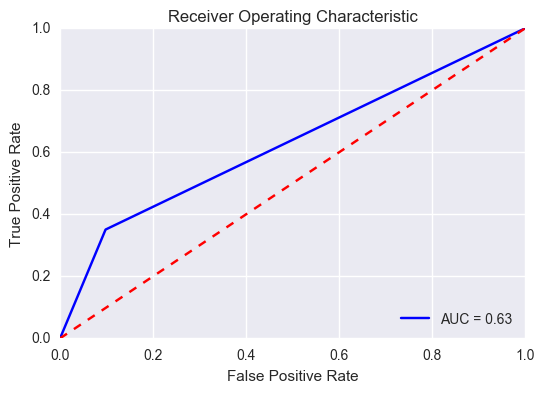

In [19]:
forest = RandomForestClassifier(n_estimators=best_feature[1],max_depth = best_feature[2],\
                                    n_jobs=-1,max_features = best_feature[3],\
                                    min_samples_leaf = best_feature[4],random_state=best_feature[5]) 
forest = forest.fit(X_train,y_train.values.ravel())
result = forest.predict(X_test)
fpr,tpr,_ = roc_curve(y_test.values,result,pos_label=2)  
roc_auc = auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
estimators = [10,100,300,600,800]
for i in range(len(estimators)):
    forest = RandomForestClassifier(n_estimators=estimators[i], n_jobs=4,class_weight = "balanced")
    forest = forest.fit(X_train,y_train.values.ravel())
    result = forest.predict(X_test)
    output = pd.DataFrame( data={"predicted":result,"actual":y_test.values.ravel()} )
    print ("accuracy score: ", accuracy_score(y_test.values,result))

Logistic Regression

In [23]:
logistic = LogisticRegression()
logistic = logistic.fit(X_train,y_train.values.ravel())
log_result = logistic.predict(X_test)
log_output = pd.DataFrame( data={"predicted":log_result,"actual":y_test.values.ravel()} )
log_output.head()

,actual,predicted
0,2,1
1,1,1
2,1,1
3,2,1
4,1,1


In [24]:
print ("accuracy_score: ", accuracy_score(y_test.values,log_result))
print(classification_report(y_test.values,log_result, target_names=['Good','Bad']))

accuracy_score:  0.74
             precision    recall  f1-score   support

       Good       0.78      0.90      0.83       143
        Bad       0.57      0.35      0.43        57

avg / total       0.72      0.74      0.72       200



Naive Bayes

In [ ]:
naive = GaussianNB()
naive = naive.fit(X_train,y_train.values.ravel())
naive_result = naive.predict(X_test)
naive_output = pd.DataFrame( data={"predicted":naive_result,"actual":y_test.values.ravel()} )
naive_output.head()

In [ ]:
print ("accuracy score: ", accuracy_score(y_test.values,naive_result))
print(classification_report(y_test.values,naive_result, target_names=['Good','Bad']))

k-Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn = knn.fit(X_train,y_train.values.ravel())
knn_result = knn.predict(X_test)
knn_output = pd.DataFrame( data={"predicted":knn_result,"actual":y_test.values.ravel()} )
knn_output.head()

In [ ]:
print ("accuracy_score: ", accuracy_score(y_test.values,knn_result))
print(classification_report(y_test.values,knn_result, target_names=['Good','Bad']))

Support Vector Machines

In [25]:
from sklearn.svm import SVC

svm = SVC()
svm = svm.fit(X_train,y_train.values.ravel())
svm_result = svm.predict(X_test)
svm_output = pd.DataFrame( data={"predicted":svm_result,"actual":y_test.values.ravel()} )
svm_output.head()

,actual,predicted
0,2,1
1,1,1
2,1,1
3,2,1
4,1,1


In [26]:
print ("accuracy_score: ", accuracy_score(y_test.values,svm_result))
print(classification_report(y_test.values,result, target_names=['Good','Bad']))

accuracy_score:  0.715
             precision    recall  f1-score   support

       Good       0.76      0.95      0.85       143
        Bad       0.68      0.26      0.38        57

avg / total       0.74      0.76      0.71       200



In [ ]:
chk = pd.DataFrame([[2, 2, 2, 'a'], [4, 4, 4, 'b'],[1,1,1,'a'], [3,3,3,'b']],columns = ['a','b','c','d'])
ab = pd.DataFrame([[5, 5, 5]],columns = ['a','b','c'])

In [ ]:
import math
import operator
def euclidean_distance(data1,data2):
    result = 0.0
    for val in range(len(data2)):
        result += (data1[val]-data2[val])**2
    return math.sqrt(result)

In [ ]:
def knn(train,test,k):
    dist,neighbors = [],[]
    for a,c in train.iterrows():
        distance = euclidean_distance(c,test)
        dist.append((c,distance))
        dist.sort(key=operator.itemgetter(1))
    for i in range(k):
        neighbors.append(dist[i][0])
    return neighbors  

In [ ]:
def majorityVote(neighbors):
    vote = {}
    for i in range(len(neighbors)):
        lst = neighbors[i][-1]
        if lst in vote:
            vote[lst]+=1
        else:
            vote[lst]=1
    majority = max(vote.items(), key=operator.itemgetter(1))[0]
    return majority

In [ ]:
train = pd.concat([X_train, y_train], axis=1)

In [ ]:
predictions = []
for i,c in X_test.iterrows():
    neighbors = knn(train,c,5)
    responses = majorityVote(neighbors)
    predictions.append(responses)
  

In [ ]:
mine_knn = pd.DataFrame( data={"predicted":predictions,"actual":y_test.values.ravel()} ) 
#print ("accuracy_score: ", accuracy_score(y_test.values,mine_knn))

In [ ]:
print ("accuracy_score: ", accuracy_score(mine_knn['actual'],mine_knn['predicted']))

In [ ]:
crx = pd.read_csv('crx.data',header=None,sep = ',')
cols = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15']
classlabel = ['A16']


In [ ]:
crx[15].value_counts()

In [ ]:
test = X_test[:10]
for i,c in test.iterrows():
    dist,neighbors = [],[]
    for a,b in train.iterrows():
        distance = euclidean_distance(b,c)
        dist.append((b,distance))
    for i in range(5):
        neighbors.append(dist[i][0])
    vote = {}
    for i in range(len(neighbors)):
        lst = neighbors[i][-1]
        if lst in vote:
            vote[lst]+=1
        else:
            vote[lst]=1
    majority = max(vote.items(), key=operator.itemgetter(1))[0]
    print(majority)